## Notas: Debo de coger la columna "tasa incidencia acumulada 14 dias" y separar con split el string. Solo necesito 2 columnas, luego paso el string derecho a entero int("str").

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
basepath = "/media/jonathan/JHON/Tesis/DatosTesis/Data_Covid19/covid19FEB_JUL.csv"
data = pd.read_csv(basepath, sep=';',dtype={"municipio_distrito": str,
                                        "tasa_incidencia_acumulada_ultimos_14dias": str,
                                        "tasa_incidencia_acumulada_total": str},index_col='fecha_informe',parse_dates=True, usecols=[0,1,3], encoding='latin-1')

data['TasaIncidenciaAcumulada_Ultimos14dias'] = [int(value.split(",",1)[0]) for value in data['tasa_incidencia_acumulada_ultimos_14dias']]
#data.dtypes

basepath = "/media/jonathan/JHON/Tesis/DatosTesis/Data_Covid19/covid19JUL_2022.csv"
data2 = pd.read_csv(basepath, sep=';',dtype={"municipio_distrito": str,
                                        "tasa_incidencia_acumulada_ultimos_14dias": str,
                                        "tasa_incidencia_acumulada_total": str},index_col='fecha_informe',parse_dates=True, usecols=[0,1,5], encoding='latin-1')

data2['TasaIncidenciaAcumulada_Ultimos14dias'] = [int(value.split(",",1)[0]) for value in data2['tasa_incidencia_acumulada_ultimos_14dias']]
data2.head(5)
#data.iloc[970:1000,:]
#data2.head(5)
#data.dtypes



,municipio_distrito,tasa_incidencia_acumulada_ultimos_14dias,TasaIncidenciaAcumulada_Ultimos14dias
fecha_informe,,,
2022-03-29 11:51:00,Madrid-Retiro,"301,6",301
2022-03-29 11:51:00,Madrid-Salamanca,"266,5",266
2022-03-29 11:51:00,Madrid-Centro,"273,97",273
2022-03-29 11:51:00,Madrid-Arganzuela,"241,57",241
2022-03-29 11:51:00,Madrid-Chamartín,"265,67",265


In [3]:
table = pd.pivot_table(data, values=["TasaIncidenciaAcumulada_Ultimos14dias"], index=["fecha_informe"], columns=["municipio_distrito"], aggfunc={"TasaIncidenciaAcumulada_Ultimos14dias":"first"})
table.head(5)

table2 = pd.pivot_table(data2, values=["TasaIncidenciaAcumulada_Ultimos14dias"], index=["fecha_informe"], columns=["municipio_distrito"], aggfunc={"TasaIncidenciaAcumulada_Ultimos14dias":"first"})
table2.head(5)

table = table.astype(np.float64)
table2 = table2.astype(np.float64)

#Quitamos los niveles sobrantes del nivel superior y reiniciamos index - Solo se hace una vez de lo contrario genera problema
table.columns =[str(s2) for (s1,s2) in table.columns.tolist()]
table_Final = table.reset_index()
table_Final.set_index('fecha_informe', inplace = True)

table2.columns =[str(s2) for (s1,s2) in table2.columns.tolist()]
table2_Final = table2.reset_index()
table2_Final.set_index('fecha_informe', inplace = True)

#table.dtypes
#table.iloc[120:127,97:115]
table2_Final.head(2)


,Ajalvir,Alameda del Valle,Alcalá de Henares,Alcobendas,Alcorcón,Aldea del Fresno,Algete,Alpedrete,Ambite,Anchuelo,...,Villamanta,Villamantilla,Villanueva de Perales,Villanueva de la Cañada,Villanueva del Pardillo,Villar del Olmo,Villarejo de Salvanés,Villaviciosa de Odón,Villavieja del Lozoya,Zarzalejo
fecha_informe,,,,,,,,,,,,,,,,,,,,,
2020-05-26 07:00:00,21.0,0.0,24.0,9.0,26.0,70.0,4.0,20.0,0.0,0.0,...,0.0,69.0,0.0,27.0,17.0,0.0,40.0,14.0,0.0,180.0
2020-06-02 07:00:00,0.0,0.0,18.0,7.0,24.0,35.0,38.0,13.0,0.0,0.0,...,0.0,69.0,0.0,51.0,17.0,0.0,13.0,25.0,0.0,0.0


## 26 Febrero 2020 - 15 Marzo 2020

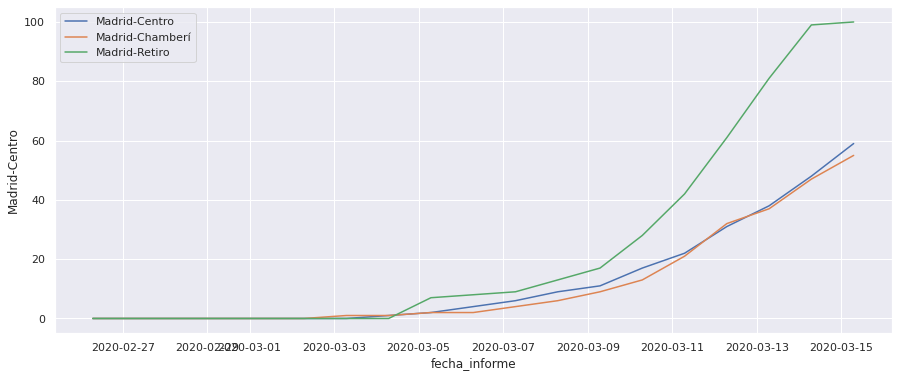

In [4]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table_Final.columns
Distrito_1 = "Madrid-Centro"
Distrito_2 = "Madrid-Retiro"
Distrito_3 = "Madrid-Chamber"
cont=1
#print(Distrito_3)
for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-02-26':'2020-03-15'],legend='brief',label=distrito)                
        

## 16 Marzo 2020 - 15 Abril 2020

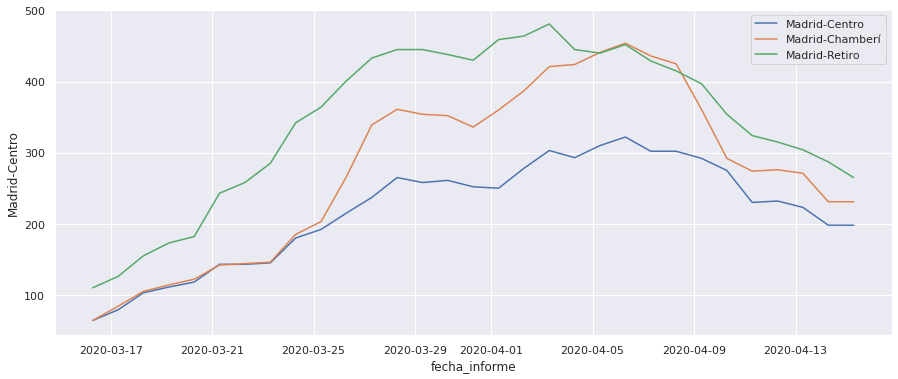

In [5]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table_Final.columns
cont=1

for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-03-16':'2020-04-15'],legend='brief',label=distrito)                
        

## 16 Abril 2020 - 15 Mayo 2020

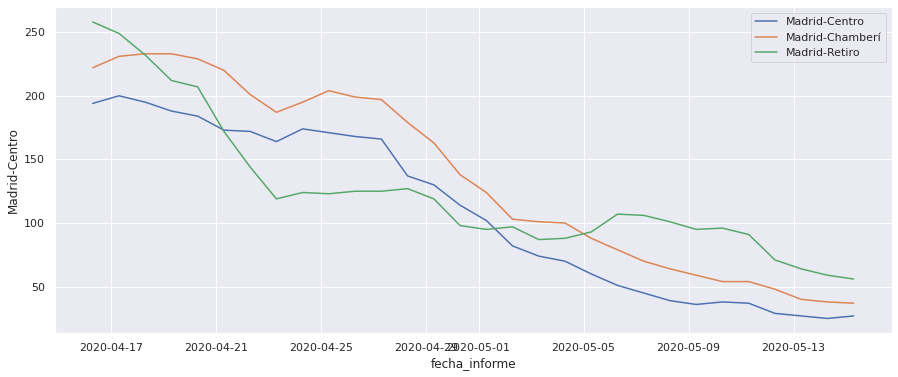

In [6]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table_Final.columns
cont=1

for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-04-16':'2020-05-15'],legend='brief',label=distrito)                

## 16 Mayo 2020 - 31 Mayo 2020

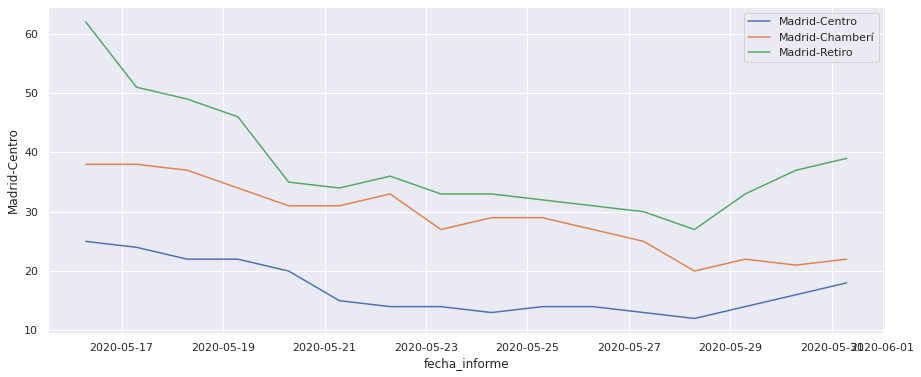

In [7]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table_Final.columns
cont=1

for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-05-16':'2020-05-31'],legend='brief',label=distrito)                

## 1 Junio 2020 - 30 Junio 2020

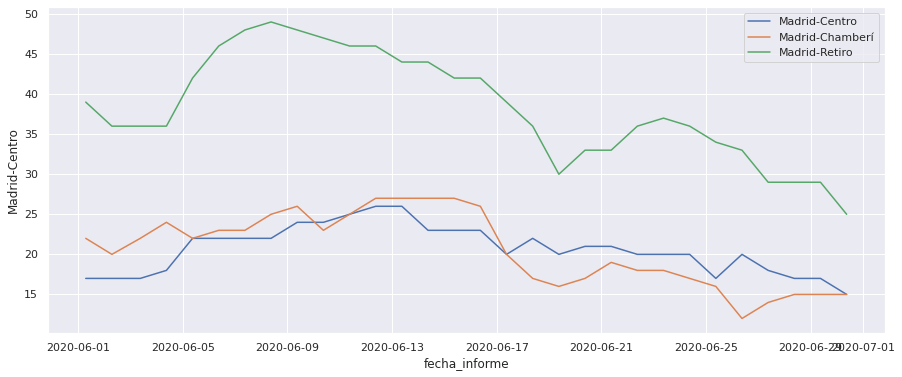

In [8]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table_Final.columns
cont=1

for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-06-01':'2020-06-30'],legend='brief',label=distrito)                

## 1 Julio 2020 - 31 Julio 2020

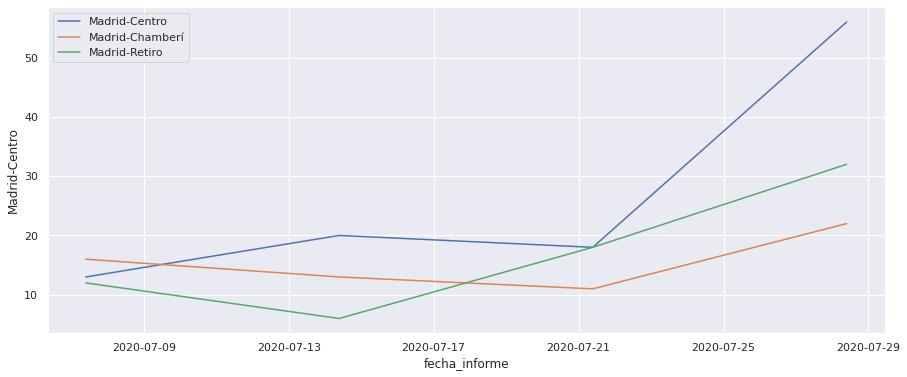

In [18]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-07-01':'2020-07-31'],legend='brief',label=distrito)                

## 1 Agosto 2020 - 31 Agosto 2020

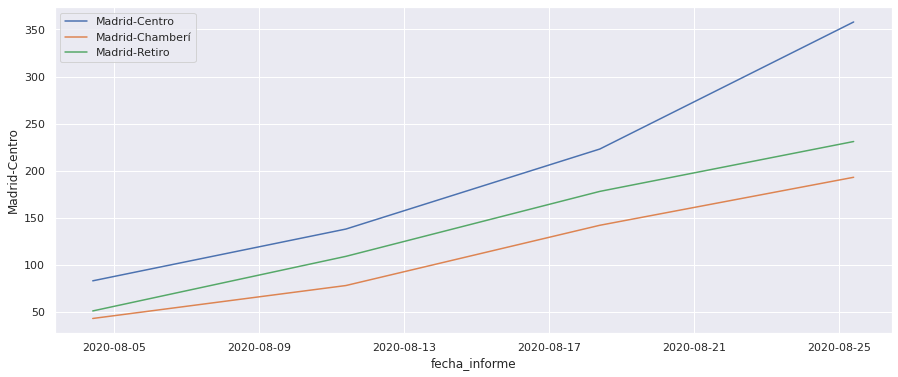

In [19]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-08-01':'2020-08-31'],legend='brief',label=distrito)                

## 1 Septiembre 2020 - 30 Septiembre 2020

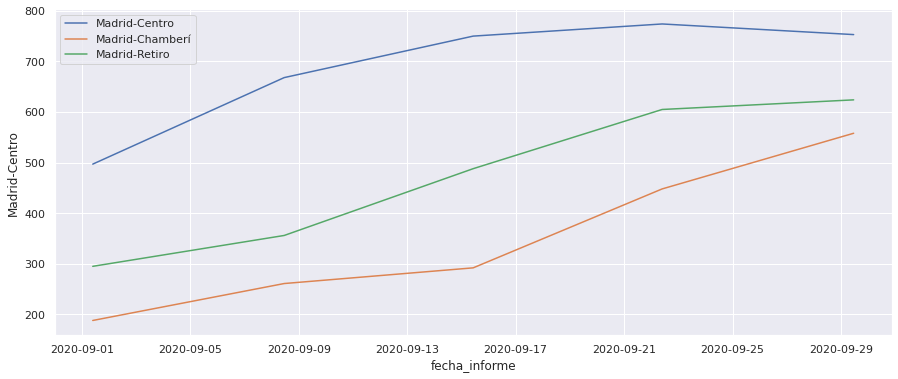

In [20]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-09-01':'2020-09-30'],legend='brief',label=distrito)                

## 1 Octubre 2020 - 31 Octubre 2020

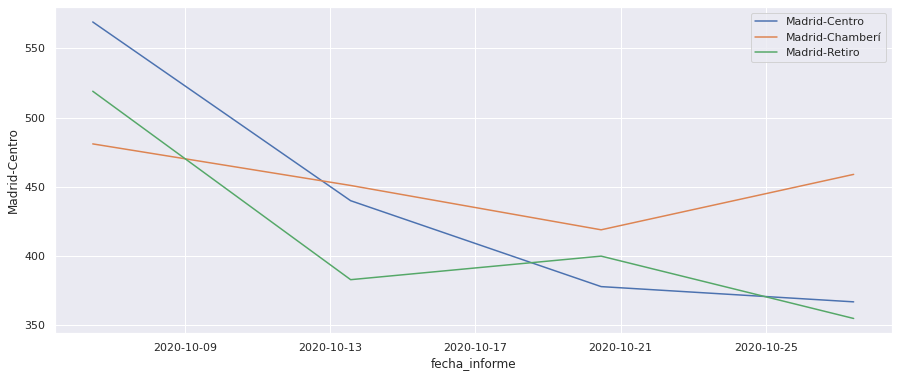

In [22]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-10-01':'2020-10-31'],legend='brief',label=distrito)                

## 1 Noviembre 2020 - 30 Noviembre 2020

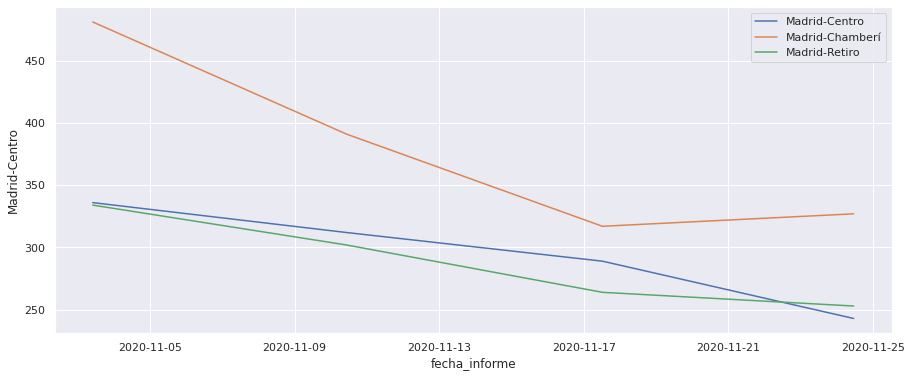

In [23]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-11-01':'2020-11-30'],legend='brief',label=distrito)                

## 1 Diciembre 2020 - 31 Diciembre 2020

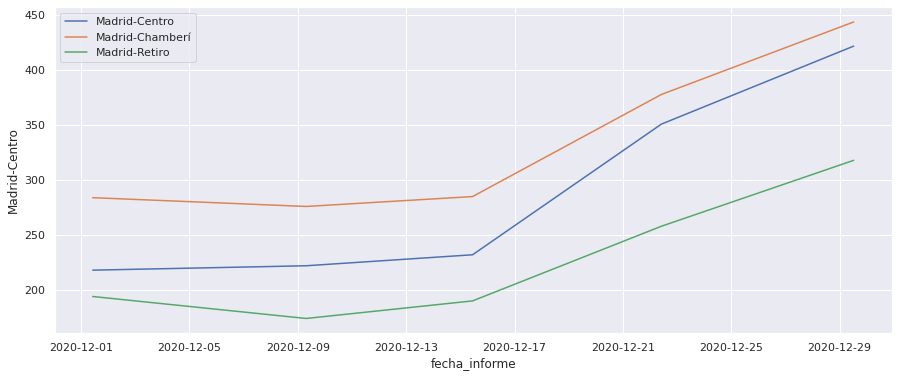

In [24]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:        
    #print(distrito)
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    z=distrito.startswith(Distrito_3)
    if (x==True) | (y==True) | (z==True):        
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-12-01':'2020-12-31'],legend='brief',label=distrito)                